In [1]:
from scipy import linalg as la
from scipy import optimize

In [2]:
import sympy
sympy.init_printing()
from sympy import I, pi, oo
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

#### 기호 입력하기

    하나의 기호 입력:
    x = sympy.Symbol(name(str), **assumptions(e.g. real, complex, positive, negative...)
    
    여러개의 기호 입력:
    x, y...= sympy.symbols(names, **args)
    
    기호의 속성의 참 거짓 확인:
    x.is_real, x.is_complex, x.is_imaginary...
    
    상수와 특별한 기호들: 
    [sympy.pi, sympy.E, sympy.EulerGamma, sympy.I, sympy.oo]

In [3]:
w, x, y, z = sympy.symbols("w, x, y, z", real=True,  positive=True)

In [4]:
# 여러 개의 변수의 list 만들기
x:10 = sympy.symbols('x:10', imaginary=True);x

In [5]:
x[1] + x[2]

In [6]:
w, x, y, z = sympy.symbols('w, x, y, z', real=True)

#### 식??

    sin, cos입력:
    sympy.sin(x), sympy.cos(x)
    
    

In [7]:
sympy.sin(x)

#### 수

    float:
    sympy.Float(a, 자릿수)
    
    분수: 
    sympy.Rational(a, b)

In [8]:
sympy.N(0.3, 20)

In [9]:
sympy.Float(0.3, 20)

In [10]:
# 문자열 입력으로 정확한 소수 입력하기
sympy.Float('0.3', 20)

### 함수

* 함수 만들기:
    
        f = sympy.function("f")
        g = sympy.Function("g")(x, y, z)
        h = sympy.Lambda((x, y,..), 관계식)
    
* 임의 수식을 함수로 만들기:
    
        sympy.lambdify((*args), expr)
    
numpy 함수로 만들기 위해서는:
    
    sympy.lambdify((*args), expr, 'numpy')
        
numpy말고도, 다른 module에서 쓰려는 함수면 그 module명을 입력하면 된다.
    
    f_mpmath = sympy.lambdify(x, f, 'mpmath')
    
* 함수의 독립변수 확인:
    
        f.free_symbols

In [11]:
expr = sympy.sin(pi * x * sympy.exp(x))

In [12]:
expr_func = sympy.lambdify(x, expr); expr_func(1.0)

In [13]:
expr_func = sympy.lambdify(x, expr, 'numpy'); expr_func(1.0)

In [14]:
?sympy.function

### 식의 조작

    간단히 하기: 
    sympy.simplify(expr)
    expr.symplify()
    
    전개:
    sympy.expand(expr)
    sympy.expr.expand(어떤 식에 대해서(기준))
    
    인수분해:
    sympy.factor(expr)
    
    합치기:
    sympy.logcombine(sympy.log(x) - sympy.log(y))
    
    한 문자에 대해 정리:
    expr.collect(x)
    expr.collect([인수 list])
    
    부분분수 분해
    sympy.apart(expr)
    expr.apart()
    
    분수식의 결합:
    sympy.together(expr)
    expr.together()
    
    분수식의 통분:
    sympy.cancel(expr)
    expr.cancel()
    
    수식의 문자 치환:
    expr.subs({x: 1.25, y: 0.4, z: 3.2}) 치환할 목록을 dictionary type로 입력

In [15]:
sympy.sin(x + y).expand(trig=True)

In [16]:
sympy.log(x * y).expand(log=True)

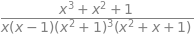

In [17]:
expr = ((x**3) +  x**2 + 1)/(x*(x - 1)*(x**2 + x + 1)*((x**2 + 1)**3)); expr

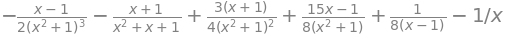

In [18]:
expr2 = expr.apart(); expr2

In [19]:
expr2.subs(x, 1.01)

In [20]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

#### 수치 계산

    sympy.N(숫자, 자리수)
    (숫자).evalf(자리수)

In [21]:
expr = sympy.sin(pi * x * sympy.exp(x))

In [22]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]

In [23]:
expr_func = sympy.lambdify(x, expr, 'numpy')
xvalues = np.arange(0, 10)
expr_func(xvalues)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

### 미적분

#### 도함수

    함수 미분:
    sysmpy.diff(함수, 변수, 미분할 횟수)
    함수.diff(변수1, 미분할 횟수, 변수2, 미분할 횟수...)
    
    함수 미분한다고 보여주기:
    sympy.Derivative(함수, 변수1, 미분할 횟수, 변수2, 미분할 횟수...)
    

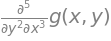

In [24]:
g = sympy.Function('g')(x, y)
g.diff(x, 3, y, 2)

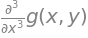

In [25]:
sympy.Derivative(g, x, 3)

In [26]:
a, b, c, d = sympy.symbols("a, b, c, d")

#### 적분

    함수 부정적분:
    sympy.integrate(함수, 변수1, 변수2...)
    함수.integrate(변수1, 변수2...)
    
    함수 정적분:
    sympy.integrate(함수, (변수1, 시작, 끝), (변수2, 시작, 끝)...)
    함수.integrate((변수1, 시작, 끝), (변수2, 시작, 끝)...)
    
    함수 적분한다고 보여주기:
    sympy.Integral(함수, (변수1, 시작, 끝), (변수2, 시작, 끝)...)
    

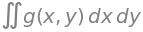

In [27]:
sympy.integrate(g, x, y)

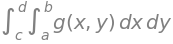

In [28]:
sympy.integrate(g, (x, a, b), (y, c, d))

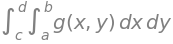

In [29]:
g.integrate((x, a, b), (y, c, d))

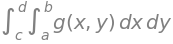

In [30]:
sympy.Integral(g,(x, a, b), (y, c, d))

In [31]:
expr = (x + y)**2
A = sympy.integrate(expr, x)
B = sympy.integrate(expr, x, y)
A, B

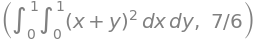

In [32]:
A = sympy.Integral(expr, (x, 0, 1), (y, 0, 1))
B = sympy.integrate(expr, (x, 0, 1), (y, 0, 1))
A, B

### 극한

    극한값 계산:
    sympy.limit(함수, 변수, 극한값을 알고싶은 수)

In [33]:
sympy.limit(sympy.sin(x)/x, x, 0)

In [34]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")
diff_limit = (f(x + h) - f(x))/h
diff_limit

In [35]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

### 수열의 합과 곱

    수열의 합 나타내기:
    sympy.Sum(일반항, (문자, 시작, 끝))
    
    수열의 곱 나타내기:
    sympy.Product(일반항, (문자, 시작, 끝))

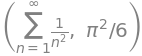

In [36]:
n = sympy.symbols("n", integer = True)
S = sympy.Sum(1/(n**2), (n, 1, oo))
S, S.doit()

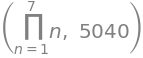

In [37]:
S = sympy.Product(n, (n, 1, 7))
S, S.doit()

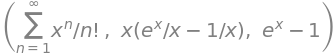

In [38]:
S = sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo))
S, S.doit(), S.doit().simplify()

### 방정식

* 한 문자에 대한 방정식 풀이:
        
        sympy.solve(expr):
        expr=0 꼴의 방정식을 푼다. 
    
* 여러 문자에 대한 방정식 풀이:
    
        sympy.soive([eq1, eq2,..], [변수1, 변수2...], dict=True)
        dict=True를 입력하지 않으면, 문자는 출력되지 않고 해들의 순서쌍만 출력된다. 

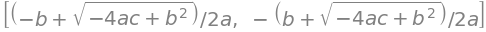

In [39]:
x, y = sympy.symbols("x, y")
a, b, c = sympy.symbols("a, b, c")
sympy.solve(a * x**2 + b * x + c, x)

In [40]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1
sympy.solve([eq1, eq2], [x, y], dict=True)

In [41]:
eq1 = x**2 - y
eq2 = y**2 - x
sols = sympy.solve([eq1, eq2], [x, y], dict=True); sols

In [42]:
sols = sympy.solve([eq1, eq2], [x, y]); sols

### 선형대수

* 행렬의 입력

        sympy.Matrix([a, b...]) 이처럼 입력하면 열벡터가 출력된다.
        sympy.Matrix([[a, b...]]) 이처럼 입력하면 행벡터가 출력된다. 
        sympy.Matrix([[low vector1], [low vector2]...])

    
* lambda 함수를 이용한 입력:

        sympy.Matrix(low number, column number, lambda m,n:expr)
    
* 행렬의 곱:

        M*N (단, M과 N 모두 sympy.Matrix 인스턴스여야 한다.)
numpy instance로 입력한 경우는 np.dot(A, B) 또는 A.dot(B)였다. 

    
* 역행렬:
        
        M.inv()
numpy instance로 입력한 경우는 np.linalg.inv(M)


* 전치행렬:
        
        M.T
numpy instance 인 경우도 M.T 


* Norm:
        
        M.norm()
numpy instance로 입력한 경우는 np.linalg.norm(M)

In [43]:
a, b, c, d = sympy.symbols("a, b, c, d")
M = sympy.Matrix([[a, b], [c, d]]);M
[M*M, M.inv(), M.T, M.norm()]

⎡                        ⎡    d         -b    ⎤                               
⎢⎡ 2                  ⎤  ⎢─────────  ─────────⎥             __________________
⎢⎢a  + b⋅c   a⋅b + b⋅d⎥  ⎢a⋅d - b⋅c  a⋅d - b⋅c⎥  ⎡a  c⎤    ╱    2      2      
⎢⎢                    ⎥, ⎢                    ⎥, ⎢    ⎥, ╲╱  │a│  + │b│  + │c│
⎢⎢                  2 ⎥  ⎢   -c          a    ⎥  ⎣b  d⎦                       
⎢⎣a⋅c + c⋅d  b⋅c + d  ⎦  ⎢─────────  ─────────⎥                               
⎣                        ⎣a⋅d - b⋅c  a⋅d - b⋅c⎦                               

         ⎤
_________⎥
2      2 ⎥
  + │d│  ⎥
         ⎥
         ⎥
         ⎦

In [44]:
N = np.array([[1, 2], [3, 4]]);N
'''
numpy array로는 숫자를 입력해야 한다. 
symbolic연산은 sympy module 전용. 
또한, 그냥 linalg module을 추가로 이용한다고 생각하면 된다.
'''
[np.dot(N, N), np.linalg.inv(N),N.T, np.linalg.norm(N)]

[array([[ 7, 10],
        [15, 22]]),
 array([[-2. ,  1. ],
        [ 1.5, -0.5]]),
 array([[1, 3],
        [2, 4]]),
 5.477225575051661]

### Mx = b 꼴의 방정식 풀이

    LU decomposition을 이용한 풀이:
    x = M.LUsolve(b)
    
    역행렬 곱을 이용한 풀이:
    x = M.inv() * b

In [46]:
b = sympy.Matrix(sympy.symbols('b_1, b_2')); b
# sympy.symbols의 결과가 하나의 list이므로 이를 입력한 결과는 열벡터이다. 

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

In [48]:
x1 = M.LUsolve(b)
x2 = M.inv() * b
x1, x2

⎛⎡    ⎛     b₁⋅c⎞     ⎤                           ⎞
⎜⎢  b⋅⎜b₂ - ────⎟     ⎥                           ⎟
⎜⎢    ⎝      a  ⎠     ⎥                           ⎟
⎜⎢- ───────────── + b₁⎥                           ⎟
⎜⎢         b⋅c        ⎥                           ⎟
⎜⎢     d - ───        ⎥  ⎡     b⋅b₂        b₁⋅d  ⎤⎟
⎜⎢          a         ⎥  ⎢- ───────── + ─────────⎥⎟
⎜⎢────────────────────⎥  ⎢  a⋅d - b⋅c   a⋅d - b⋅c⎥⎟
⎜⎢         a          ⎥, ⎢                       ⎥⎟
⎜⎢                    ⎥  ⎢    a⋅b₂        b₁⋅c   ⎥⎟
⎜⎢          b₁⋅c      ⎥  ⎢ ───────── - ───────── ⎥⎟
⎜⎢     b₂ - ────      ⎥  ⎣ a⋅d - b⋅c   a⋅d - b⋅c ⎦⎟
⎜⎢           a        ⎥                           ⎟
⎜⎢     ─────────      ⎥                           ⎟
⎜⎢          b⋅c       ⎥                           ⎟
⎜⎢      d - ───       ⎥                           ⎟
⎝⎣           a        ⎦                           ⎠